<a href="https://colab.research.google.com/github/GrichinNikita2019/yandex_praktikum_da/blob/main/monetization_model/monetization_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ поведения игроков в зависимости от рекламного источника

**Цель проекта**:
* Проанализировать поведение игроков в зависимости от источника перехода.

**Задачи проекта**:
* Проведение исследовательского анализа данных,
* Проанализировать влияние источника перехода в игру на поведение пользователя,
* Проверить статистические гипотезы:
    1. Время завершения уровня различается в зависимости способа прохождения (через реализацию проекта, через победу над первым игроком);
    2. Среднее число конверсий (постройка здания) / стоимость конверсии (постройка здания) различается в зависимости способа прохождения (через реализацию проекта, через победу над первым игроком):

**План работы:**
1. **Шаг 1. Произвести предобработку данных**:
    - Исследовать пропущенные значения;
    - Заменить пропущенные значения;
    - Исследовать соответствие типов;
    - Привести типы;
    - Исследовать дубликаты;
    - Удалить дубликаты;
    - Проверить корректность наименований колонок;
    - Переименовать колонки.

2. **Шаг 2. Провести исследовательский анализ данных:**;
    - Посмотреть на распределения переменных:
    
        - *event_datetime*: (1) посмотреть, какой временной интервал представлен, (2) посмотреть на частоту событий по времени (день недели, час и т.д.), чтобы обнаружить, в какое время люди более интенсивно играют;
        - *event*: посмотреть, какие типы событий более распространены, то есть определить более популярную стратегию (через реализацию проекта (project) или через победу над игроком (finished_stage_1 за исключением project));
        - *building_type*: (1) посмотреть, какие типы построек наиболее распространены, (2) посмотреть, какие типы построек наиболее распространены для разных стратегий прохождения (через реализацию проекта (project) или через победу над игроком (finished_stage_1 за исключением project))
        - *source*: посмотреть, достаточно ли представлены все источники в выборке (все ли достаточно наполнены наблюдениями для сравнения).

     
3. **Шаг 3. Проанализировать влияние источника перехода в игру на поведение пользователя**:
    - Посмотреть, отличается ли среднее количество построенных зданий в зависимости от источника (так как предполагается, что в приложении будет происходить показ рекламы на экране с выбором типа объекта для постройки, то количество построенных зданий то действие, которое можно считать 
    - Посмотреть, отличается ли время на прохождение уровня;
    - Посмотреть, какой тип стратегии преобладает в зависимости от источника (через реализацию проекта (project) или через победу над игроком (finished_stage_1 за исключением project)).

4. **Шаг 4. Проверить статистические гипотезы**:
    - Проверить гипотезу: время завершения уровня различается в зависимости способа прохождения:
        - через реализацию проекта;
        - через победу над первым игроком.
5. **Шаг 5. Сформулировать собственную статистическую гипотезу**:
    - Проверить гипотезу: среднее число построенных зданий различается в зависимости способа прохождения:
        - через реализацию проекта;
        - через победу над первым игроком.

**Описание данных:**

Основной датасет содержит данные о событиях, совершенных в мобильной игре «Космические братья». В ней пользователи строят свою космическую программу и пытаются преуспеть в нелёгком деле колонизации галактики.

Основная монетизация игры — только планируется. Но предполагается, что в приложении будет происходить показ рекламы на экране с выбором типа объекта для постройки.

В датасете представлены данные по игре пользователей на первом уровне. Завершение первого уровня требует от игрока выполнения одного из двух условий:

- Победа над первым врагом
- Реализация проекта - разработка орбитальной сборки спутников

В датасете содержатся данные первых пользователей приложения — когорты пользователей, которые начали пользоваться приложением в период с 4 по 10 мая включительно.

**Структура данных game_actions:**

* event_datetime — *время события*
* event — *одно из трёх событий*:
  * building — *объект построен*
  * finished_stage_1 — *первый уровень завершён*
  * project — *проект завершён*
* building_type — *один из трёх типов здания*:
  * assembly_shop — *сборочный цех*
  * spaceport — *космопорт*
  * research_center — *исследовательский центр*  
* user_id — *идентификатор пользователя*
* project_type — *тип реализованного проекта*

Помимо основного датасета есть два датасета с информацией о рекламных активностях. Они также помогут в решении задачи.

**Структура данных ad_cost:**

* day — *день, в который был совершен клик по объявлению*
* source — *источник трафика*
* cost — *стоимость кликов*

**Структура данных user_source:**

* user_id — *идентификатор пользователя*
* source — *источников, с которого пришёл пользователь, установивший приложение*

## Изучение данных из файла

### Импорт библиотек, настройка отображения данных и загрузка данных

In [ ]:
import pandas as pd
import numpy as np
import math as mth
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats as st

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
plt.style.use('dark_background')
warnings.filterwarnings('ignore')

In [ ]:
game_actions = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTmFEcma_nmg06f0kKcC7oJ2WDZ8EZ-KRGBbSK1xgioJc47T_gW2nmAv6n0JZuK-P4zJ6MhwGVOmTkP/pub?output=csv")
user_source = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQM7d57ksdO-RupCUnoI1qc-fZ_c_A-PLH3GqgnIvODE9_3JKfa3PSdcgg6Kg_7yxTzlkiDGXpO6i1h/pub?output=csv")
ad_cost = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRHgz5-6daMQQV8mzEqpvKCdeQpwYV9zpl68XMl-L0_hfvzgtLnDbNZ1EzpjBdmQtFNqqyQu__H8med/pub?output=csv")

### Изучение таблицы game_actions

#### Названия столбцов

In [ ]:
game_actions.columns

Index(['event_datetime', 'event', 'building_type', 'user_id', 'project_type'], dtype='object')

С названием переменных все в порядке.

#### Пропуски, дубликаты и типы данных

In [ ]:
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
event_datetime    135640 non-null object
event             135640 non-null object
building_type     127957 non-null object
user_id           135640 non-null object
project_type      1866 non-null object
dtypes: object(5)
memory usage: 5.2+ MB


Тип переменной *event_datetime* необходимо заменить на datetime.

In [ ]:
game_actions['event_datetime'] = game_actions['event_datetime'].astype('datetime64')

In [ ]:
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
event_datetime    135640 non-null datetime64[ns]
event             135640 non-null object
building_type     127957 non-null object
user_id           135640 non-null object
project_type      1866 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 5.2+ MB


Теперь используемые типы данных адекватны данным, хранящимся в наших переменных.

Далее проверим данные на наличие дубликатов и пропусков.

In [ ]:
(
game_actions.duplicated()
            .sum()
)

1

В нашем датафрейме 1 дубликат. Избавимся от него.

In [ ]:
game_actions = (
game_actions.drop_duplicates()
            .reset_index(drop=True)
)

In [ ]:
(
game_actions.duplicated()
            .sum()
)

0

Больше дубликатов не осталось.

Теперь очередь пропусков.

In [ ]:
(
pd.DataFrame(round((game_actions.isna().mean()*100),2),
             columns = ['share_of_missing_values'])
            .style.background_gradient('coolwarm')
)

,share_of_missing_values
event_datetime,0
event,0
building_type,5.66
user_id,0
project_type,98.62


Видно, что есть небольшой процент (5.66%) пропусков по переменной *building_type*, а переменная project_type так вообще на 98.62% состоит из пропусков. Однако есть предположение, что эти пропуски и должны быть, так как:
1. Не все действия в игре ограничиваются постройкой здания, следовательно не у всех записей в датафрейме будет характеристика "тип постройки";
2. Не все дейсвия игроков сводятся к реализации проекта, поэтому не у всех записей будет характеристика "тип проекта".

Проверим это.

Для начала определим долю игроков, которые не осуществляли действие с именем *building*.

In [ ]:
round(100 - (len(game_actions['event'][game_actions['event'] == 'building']) / len(game_actions) * 100),2)

5.66

Доля совпадает с долей пропусков по переменной *building_type*, то есть пропуски в данном случае это адекватно, из чего следует, что их не нужно заполнять. Теперь к *project_type*.

In [ ]:
round(100 - (len(game_actions['event'][game_actions['event'] == 'project']) / len(game_actions) * 100),2)

98.62

Та же история: доля совпадает с долей пропусков по переменной *project_type*, поэтому заполнять их не нужно.

### Изучение таблицы user_source

#### Названия столбцов

In [ ]:
user_source.columns

Index(['user_id', 'source'], dtype='object')

С названием переменных все также в порядке.

#### Пропуски, дубликаты и типы данных

In [ ]:
user_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
user_id    13576 non-null object
source     13576 non-null object
dtypes: object(2)
memory usage: 212.2+ KB


Используются подходящие типы данных.

In [ ]:
(
user_source.duplicated()
           .sum()
)

0

Дубликаты отсутствуют.

In [ ]:
(
pd.DataFrame(round((user_source.isna().mean()*100),2),
             columns = ['share_of_missing_values'])
            .style.background_gradient('coolwarm')
)

,share_of_missing_values
user_id,0
source,0


Пропуски отсутствуют.

### Изучение таблицы ad_cost

#### Названия столбцов

In [ ]:
ad_cost.columns

Index(['source', 'day', 'cost'], dtype='object')

С названием переменных все в порядке.

In [ ]:
ad_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
source    28 non-null object
day       28 non-null object
cost      28 non-null float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


Тип переменной *day* необходимо заменить на datetime.

In [ ]:
ad_cost['day'] = ad_cost['day'].astype('datetime64')

In [ ]:
ad_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
source    28 non-null object
day       28 non-null datetime64[ns]
cost      28 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 800.0+ bytes


Теперь используемые типы данных адекватны данным, хранящимся в наших переменных.

In [ ]:
(
ad_cost.duplicated()
       .sum()
)

0

Дубликаты отсутствуют.

In [ ]:
(
pd.DataFrame(round((ad_cost.isna().mean()*100),2),
             columns = ['share_of_missing_values'])
            .style.background_gradient('coolwarm')
)

,share_of_missing_values
source,0
day,0
cost,0


Пропуски отсутствуют.

**Общие выводы по разделу:**

1. На этапе предобработки был обнаружен ряд недостатков, которые были исправлены:
- Переменные*event_datetime* таблицы *game_actions* и *day* таблицы *ad_cost* были приведены к типу *datetime*;
- В таблице *game_actions* присутствовал 1 дубликат
2. В остальном в предоставленных данных не наблюдается заметных недостатков: пропуски данных отсутствуют, заголовки имеют адекватные имена.

## Исследовательский анализ данных

### Изучение распределения пользователей и событий по дням

**Задача**:
посмотреть, какой временной интервал представлен, (2) посмотреть на частоту событий по времени (день недели, час и т.д.), чтобы обнаружить, в какое время люди более интенсивно играют.

Для начала посмотрим на динамику числа пользователей по дням.

In [ ]:
game_actions['session_day'] = game_actions['event_datetime'].astype("datetime64[D]")

In [ ]:
game_actions['session_day'].describe()

count                  135639
unique                     33
top       2020-05-10 00:00:00
freq                    15207
first     2020-05-04 00:00:00
last      2020-06-05 00:00:00
Name: session_day, dtype: object

В нашем датасете представлены данные за месяц: с 2020-05-04 по 2020-06-05. За такой короткий срок нет большого смысла смотреть на динамику по неделям, остановимся на динамике по дням. Другими словами, посчитаем DAU.

In [ ]:
dau = (
    game_actions.groupby('session_day')
                .agg({'user_id': 'nunique'})
                .reset_index()
)

In [ ]:
dau.describe()

,user_id
count,33.000
mean,2884.879
std,3083.784
min,4.000
25%,91.000
50%,1480.000
75%,5776.000
max,9219.000


Среднее число пользователей в приложении в рассматриваемый период составлет 2884.879. Однако медианное значение существенно ниже - 1480, что говорит о наличии дней с аномально высокой активностью. Вероятнее всего, на эти дни приходились рекламные пики. Посмотрим на них внимательнее.

In [ ]:
dau.sort_values('user_id',ascending = False).head()

,session_day,user_id
6,2020-05-10,9219
5,2020-05-09,8394
4,2020-05-08,7891
3,2020-05-07,7384
2,2020-05-06,6854


Наибольшее число пользователей зафиксировано в период с 2020-05-06 по 2020-05-10.

In [ ]:
dau.sort_values('user_id',ascending = True).head()

,session_day,user_id
32,2020-06-05,4
31,2020-06-04,7
30,2020-06-03,9
29,2020-06-02,11
28,2020-06-01,16


Наименьшее число пользователей наблюдается с 2020-06-01 по 2020-06-05. Посмотрим на более общую картину.

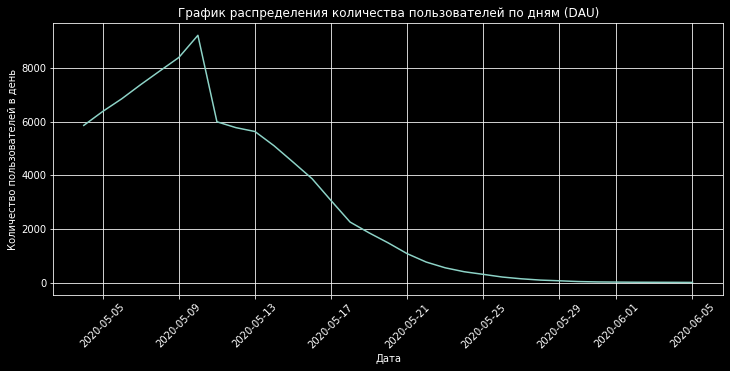

In [ ]:
plt.figure(figsize=(12,5))

plt.plot(dau['session_day'], dau['user_id'])
                                                                      
plt.title('График распределения количества пользователей по дням (DAU)')
plt.ylabel("Количество пользователей в день")
plt.xlabel("Дата")
plt.xticks(rotation=45)
plt.grid()
plt.show()

Из графика видим,что с начала рассматриваемого периода до 2020-05-10 наблюдался равномерный рост количества пользователей, после которого началось резкое снижение, которое с разной скоростью продолжалось вплоть до окончания периода: 2020-06-05 количество игроков достигло 4. Падение числа пользователей с 2020-05-10 связано с окончанием рекламной кампании. Это можно проверить посмотрев на данные в датафрейме *ad_cost*.

In [ ]:
print('''Начало рекламной кампании: {:%d.%m.%Y}
Окончание рекламной кампании {:%d.%m.%Y}'''.format(ad_cost['day'].min(),
                                                         ad_cost['day'].max()))

Начало рекламной кампании: 03.05.2020
Окончание рекламной кампании 09.05.2020


Теперь более детально посмотрим на распределение событий в этот период.

In [ ]:
events_count = (
    game_actions.groupby('session_day')
    .agg({'event': 'count'})
    .reset_index()
)

In [ ]:
events_count.describe()

,event
count,33.000
mean,4110.273
std,4639.714
min,5.000
25%,118.000
50%,1837.000
75%,7918.000
max,15207.000


Среднее число событий за день: 4110.273

Медианное: 1837

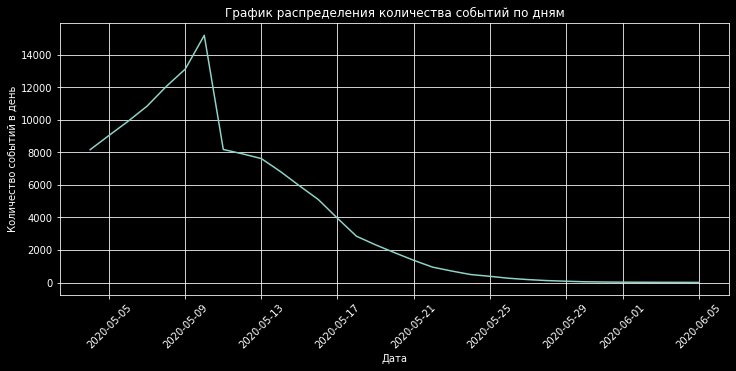

In [ ]:
plt.figure(figsize=(12,5))

plt.plot(events_count['session_day'], events_count['event'])
                                                                      
plt.title('График распределения количества событий по дням')
plt.ylabel("Количество событий в день")
plt.xlabel("Дата")
plt.xticks(rotation=45)
plt.grid()
plt.show()

Динамика распределения количества событий по дням в целом совпадает с распределением числа пользователей: с начала рассматриваемого периода до 2020-05-10 наблюдался равномерный рост количества пользователей, после которого началось резкое снижение, которое с разной скоростью продолжалось вплоть до окончания периода.

### Количество событий на пользователя

Далее посмотрим на динамику количества событий на пользователя.

In [ ]:
events_per_user=(
    game_actions.groupby('user_id')
                .agg({'event': 'count'})
                .reset_index()
)

In [ ]:
events_per_user.describe()

,event
count,13576.000
mean,9.991
std,4.146
min,1.000
25%,6.000
50%,10.000
75%,13.000
max,22.000


Среднее количество событий на пользователя составляет 10.

### Анализ типов событий

**Задача**:

Посмотреть, какие типы событий более распространены, то есть определить более популярную стратегию (*через реализацию проекта (project) или через победу над игроком (finished_stage_1 за исключением project)*)

In [ ]:
game_actions['event'].value_counts()

building            127956
finished_stage_1      5817
project               1866
Name: event, dtype: int64

Наиболее популярный тип события - *building*. Что не удивительно, так как без постройки зданий невозможно пройти уровень.

In [ ]:
game_actions['building_type'].value_counts()

spaceport          59325
assembly_shop      54494
research_center    14137
Name: building_type, dtype: int64

Наиболее часто игроки строят *spaceport*, с небольшим отставанием идет *assembly_shop*. Значительно реже пользователи строят *research_center*.

Так как предполагается, что реклама будет показываться в окне выбора постройки, от количества построенных зданий будет зависить объем выручки от рекламы. Соответственно, одна стратегия может быть прибыльнее другой.

Посмотрим на средние количество построенных зданий в зависимости от стратегии.
Начнем с завершивших проект.

In [ ]:
finish_by_project = (
    game_actions.query('event=="project"')['user_id']
                .unique()
)

In [ ]:
print('Среднее число построенных зданий для прошедших уровень через проект: {} штук'.format(int(round(game_actions[game_actions['user_id'].isin(finish_by_project)].groupby('user_id').agg({'building_type': 'count'}).mean(),3))))

Среднее число построенных зданий для прошедших уровень через проект: 12 штук


Теперь то же самое для игроков, прошедших игру через победу над врагом.

In [ ]:
finish_by_fight = (
    game_actions.query('project_type != "satellite_orbital_assembly" and event=="finished_stage_1"')['user_id']
                .unique()
)

In [ ]:
print('Среднее число построенных зданий для прошедших уровень через победу над врагом: {} штук'.format(int(round(game_actions[game_actions['user_id'].isin(finish_by_fight)].groupby('user_id').agg({'building_type': 'count'}).mean(),2))))

Среднее число построенных зданий для прошедших уровень через победу над врагом: 10 штук


Как видно, среди игроков, использовавших для прохождения уровня стратегию реализации проекта, среднее количество построенных зданий выше на 2, чем среди использующих стратегию победы над врагом. Поэтому вторая стратегию потенциально менее прибыльная с точки зрения доходов с размещения рекламы. Поэтому стоит подумать о двух вещах:
1. Добавление дополнительного рекламного места, например, в окне принятия решения о нападении.
2. Коррективровании баланса таким образом, чтобы мотивировать PVP-игроков строить больше зданий.

## Анализ эффективности рекламных источников

### Объемы рекламного трафика по источникам

**Задача**:
Проанализировать влияние источника перехода в игру на поведение пользователя

Для начала посмотрим на распределение количества пользователей в зависимости от рекламного источника.

In [ ]:
game_actions_source = game_actions.merge(user_source, on='user_id')

In [ ]:
users_per_source=(
    game_actions_source.groupby(['source'])
                       .agg({'user_id':'nunique'})
                       .reset_index()
)

In [ ]:
users_per_source.sort_values('user_id',ascending=False)

,source,user_id
2,yandex_direct,4817
1,instagram_new_adverts,3347
0,facebook_ads,2726
3,youtube_channel_reklama,2686


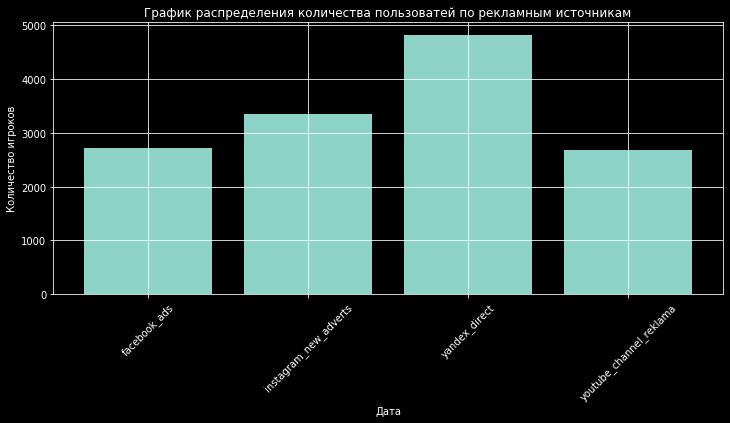

In [ ]:
plt.figure(figsize=(12,5))

plt.bar(users_per_source['source'], users_per_source['user_id'])
                                                                      
plt.title('График распределения количества пользоватей по рекламным источникам')
plt.ylabel("Количество игроков")
plt.xlabel("Дата")
plt.xticks(rotation=45)
plt.grid()
plt.show()

Наибольший объем привлеченных пользователей приходится на инструмент контекстной рекламы - Яндекс.Директ. Наименьший у ОЛВ - YouTube.

### Затраты на рекламу

Теперь посмотрим на общие затраты по рекламным источникам.

In [ ]:
print('Общее количество затрат:', round(ad_cost['cost'].sum(),2))

Общее количество затрат: 7603.58


### Стоимость привлечения пользователя

Далее посмотрим сколько стоило привлечение одного покупателя в зависимости от рекламного источника: посчитаем CAC.

Подсчитаем количество пользователей по дате первого входа в игру и источнику рекламы:

In [ ]:
first_visit = (
    game_actions.groupby('user_id')
                .agg({'session_day':'min'})
                .reset_index()
                .rename(columns={'session_day':'first_session_day'})
)

In [ ]:
events = game_actions.merge(first_visit,on='user_id')

In [ ]:
events_actions_source = events.merge(user_source, on='user_id')

In [ ]:
users_date_source=(
    events_actions_source.groupby(['first_session_day', 'source'])
                       .agg({'user_id': 'nunique'})
                       .reset_index()
)

Поскольку дата рекламных затрат предшествует дате первого входа в игру, необходимо создать дополнительную переменную для выравнивания дат:

In [ ]:
users_date_source['ad_show_day'] = users_date_source['first_session_day'] - pd.Timedelta(days=1)

In [ ]:
costs = pd.merge(ad_cost,
                 users_date_source, 
                 how='left',
                 left_on=['day','source'],
                 right_on = ['ad_show_day','source'])

In [ ]:
costs_source=(
    costs.groupby('source')
         .agg({'cost':'sum', 'user_id':'sum'})
         .reset_index()
)

Теперь рассчитаем CAC по рекламному источнику:

In [ ]:
costs_source['cac'] = costs_source['cost'] / costs_source['user_id']
costs_source

,source,cost,user_id,cac
0,facebook_ads,2140.905,2726,0.785
1,instagram_new_adverts,2161.442,3347,0.646
2,yandex_direct,2233.111,4817,0.464
3,youtube_channel_reklama,1068.119,2686,0.398


Наименее эффективный с точки зрения кост-эффективности рекламный источник: facebook. Наиболее - YouTube.

**Задача**:
Посмотреть, отличается ли среднее количество построенных зданий в зависимости от источника (так как предполагается, что в приложении будет происходить показ рекламы на экране с выбором типа объекта для постройки, то количество построенных зданий то действие, которое можно считать

### Количество построенных зданий по источникам

Далее посмотрим, отличается ли среднее количество построенных зданий в зависимости от рекламной площадки.

In [ ]:
users_count_events_source=(
    game_actions_source.groupby(['source','user_id'])
                       .agg({'event': 'count'})
                       .reset_index()
)

In [ ]:
users_count_events_source_mean=(
    users_count_events_source.groupby('source')
                             .agg({'event': 'mean'})
                             .reset_index()
)

In [ ]:
users_count_events_source_mean

,source,event
0,facebook_ads,10.151
1,instagram_new_adverts,10.086
2,yandex_direct,9.901
3,youtube_channel_reklama,9.872


Среднее число построенных зданий выше по источнику facebook_ads. Наименьший результат у YouTube. Однако различия составляют менее 1 здания.

### Распределение типов стратегии по источникам

**Задача**:
Посмотреть, какой тип стратегии преобладает в зависимости от источника (через реализацию проекта (project) или через победу над игроком (finished_stage_1 за исключением project)).    

Далее посмотрим, отличается ли распространенность стратегии в зависимости от источника.

In [ ]:
facebook_ads = (
    game_actions_source.query('source == "facebook_ads" and event != "building"')
                       .groupby(['source','event'])
                       .agg({'user_id': 'nunique'})
                       .reset_index()
)

yandex_direct = (
    game_actions_source.query('source == "yandex_direct" and event != "building"')
                       .groupby(['source','event'])
                       .agg({'user_id': 'nunique'})
                       .reset_index()
)

instagram_new_adverts = (
    game_actions_source.query('source == "instagram_new_adverts" and event != "building"')
                       .groupby(['source','event'])
                       .agg({'user_id': 'nunique'})
                       .reset_index()
)

youtube_channel_reklama = (
    game_actions_source.query('source == "youtube_channel_reklama" and event != "building"')
                       .groupby(['source','event'])
                       .agg({'user_id': 'nunique'})
                       .reset_index()
)

In [ ]:
yandex_direct['%'] = yandex_direct['user_id'] / yandex_direct['user_id'].sum() * 100
instagram_new_adverts['%'] = instagram_new_adverts['user_id'] / instagram_new_adverts['user_id'].sum() * 100
facebook_ads['%'] = facebook_ads['user_id'] / facebook_ads['user_id'].sum() * 100
youtube_channel_reklama['%'] = youtube_channel_reklama['user_id'] / youtube_channel_reklama['user_id'].sum() * 100

In [ ]:
display(facebook_ads)
display(yandex_direct)
display(instagram_new_adverts)
display(youtube_channel_reklama)

,source,event,user_id,%
0,facebook_ads,finished_stage_1,1150,74.627
1,facebook_ads,project,391,25.373


,source,event,user_id,%
0,yandex_direct,finished_stage_1,2042,76.709
1,yandex_direct,project,620,23.291


,source,event,user_id,%
0,instagram_new_adverts,finished_stage_1,1466,75.489
1,instagram_new_adverts,project,476,24.511


,source,event,user_id,%
0,youtube_channel_reklama,finished_stage_1,1159,75.358
1,youtube_channel_reklama,project,379,24.642


Нельзя сказать, что в зависимости от источника сильно варьируется доля игроков, избравших разную стратегию: стратегию через победу над другим игроком избирают от 74.627 (facebook_ads) до 76.709 (yandex_direct) игроков.

### Распределение типов построек по источникам

Далее посмотрим, отличаются ли доли типов построек в зависимости от источника.

In [ ]:
game_actions_source['source'].value_counts()

yandex_direct              47694
instagram_new_adverts      33757
facebook_ads               27672
youtube_channel_reklama    26516
Name: source, dtype: int64

In [ ]:
facebook_ads_building_type = (
    game_actions_source.query('source == "facebook_ads" and event == "building"')
                       .groupby(['source','building_type'])
                       .agg({'user_id': 'nunique'})
                       .reset_index()
)

yandex_direct_building_type = (
    game_actions_source.query('source == "yandex_direct" and event == "building"')
                       .groupby(['source','building_type'])
                       .agg({'user_id': 'nunique'})
                       .reset_index()
)

instagram_new_adverts_building_type = (
    game_actions_source.query('source == "instagram_new_adverts" and event == "building"')
                       .groupby(['source','building_type'])
                       .agg({'user_id': 'nunique'})
                       .reset_index()
)

youtube_channel_reklama_building_type = (
    game_actions_source.query('source == "youtube_channel_reklama" and event == "building"')
                       .groupby(['source','building_type'])
                       .agg({'user_id': 'nunique'})
                       .reset_index()
)

In [ ]:
yandex_direct_building_type['%'] = yandex_direct_building_type['user_id'] / yandex_direct_building_type['user_id'].sum() * 100
instagram_new_adverts_building_type['%'] = instagram_new_adverts_building_type['user_id'] / instagram_new_adverts_building_type['user_id'].sum() * 100
facebook_ads_building_type['%'] = facebook_ads_building_type['user_id'] / facebook_ads_building_type['user_id'].sum() * 100
youtube_channel_reklama_building_type['%'] = youtube_channel_reklama_building_type['user_id'] / youtube_channel_reklama_building_type['user_id'].sum() * 100

In [ ]:
display(facebook_ads_building_type)
display(yandex_direct_building_type)
display(instagram_new_adverts_building_type)
display(youtube_channel_reklama_building_type)

,source,building_type,user_id,%
0,facebook_ads,assembly_shop,2726,39.127
1,facebook_ads,research_center,1577,22.635
2,facebook_ads,spaceport,2664,38.237


,source,building_type,user_id,%
0,yandex_direct,assembly_shop,4817,39.396
1,yandex_direct,research_center,2710,22.164
2,yandex_direct,spaceport,4700,38.440


,source,building_type,user_id,%
0,instagram_new_adverts,assembly_shop,3347,39.279
1,instagram_new_adverts,research_center,1906,22.368
2,instagram_new_adverts,spaceport,3268,38.352


,source,building_type,user_id,%
0,youtube_channel_reklama,assembly_shop,2686,39.716
1,youtube_channel_reklama,research_center,1478,21.854
2,youtube_channel_reklama,spaceport,2599,38.430


В зависимости от источника доли типов построек также сильно не различаются.

## Проверка статистических гипотез

### Гипотеза о времени завершения уровня в зависимости от способа прохождения

**Задача**:
- Проверить гипотезу: время завершения уровня различается в зависимости способа прохождения:
        - через реализацию проекта;
        - через победу над первым игроком.

In [ ]:
win_events = events.drop(events[events['event'] == 'building'].index)
win_events['win_time'] = win_events['event_datetime']-win_events['first_session_day']
win_events['win_time_sec'] = win_events['win_time'].dt.total_seconds()

In [ ]:
win_events.query('event=="project"')['win_time_sec'].describe()

count      1866.000
mean    1065203.471
std      314565.773
min      377368.000
25%      844058.750
50%     1010376.000
75%     1235265.250
max     2511760.000
Name: win_time_sec, dtype: float64

In [ ]:
win_events.query('event=="finished_stage_1"')['win_time_sec'].describe()

count      5817.000
mean    1063437.197
std      351555.002
min       71249.000
25%      831181.000
50%     1037891.000
75%     1266975.000
max     2735438.000
Name: win_time_sec, dtype: float64

Средние показатели для различных стратегий "на глаз" отличаются не существенно. Посмотрим, как это выглядит на графике.

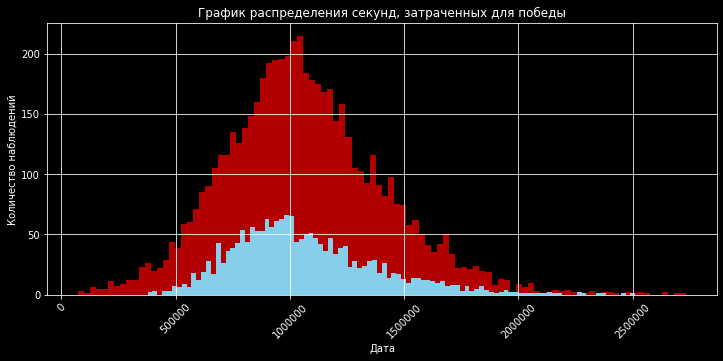

In [ ]:
plt.figure(figsize=(12,5))

plt.hist(win_events.query('event=="finished_stage_1"')['win_time_sec'], color="red", bins = 100, alpha=0.7)
plt.hist(win_events.query('event=="project"')['win_time_sec'], color="skyblue", bins = 100)

                                                                      
plt.title('График распределения секунд, затраченных для победы')
plt.ylabel("Количество наблюдений")
plt.xlabel("Дата")
plt.xticks(rotation=45)
plt.grid()
plt.show()

Одно из условий применения теста Стьюдента: дисперсии подгрупп долны быть однородными. Для этого применяется критерий Левена.

Если **(p Levene) > 0.05**, то дисперсии подгрупп гомогенн

In [ ]:
alpha = 0.05

tariff_levene = st.levene(
    win_events.query('event=="project"')['win_time_sec'],
    win_events.query('event=="finished_stage_1"')['win_time_sec'])

print('p-значение:', tariff_levene.pvalue)

if (tariff_levene.pvalue < alpha):
    print("Отвергаем нулевую гипотезу о равенстве дисперсий: дисперсии не равны")
else:
    print("Не получилось отвергнуть нулевую гипотезу: дисперсии возможно равны")

p-значение: 2.6042268340291133e-07
Отвергаем нулевую гипотезу о равенстве дисперсий: дисперсии не равны


**Гипотеза о равенстве средних двух генеральных совокупностей (для независимых выборок):**

H0 = время на прохождение уровня одинаково для представителей разных стратегий равны (нет разница)
H0 = время на прохождение уровня различно для представителей разных стратегий равны (есть разница)

Так как мы показали, что дисперсии неоднородны, установим параметр equal_var=False

In [ ]:
alpha = 0.05

results = st.ttest_ind(
    win_events.query('event=="project"')['win_time_sec'],
    win_events.query('event=="finished_stage_1"')['win_time_sec'],
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу (есть разница)")
else:
    print("Не получилось отвергнуть нулевую гипотезу (возможно нет разницы)")

p-значение: 0.8376275550237213
Не получилось отвергнуть нулевую гипотезу (возможно нет разницы)


Отсутствуют статистически значимые различия средних значений времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком.

### Гипотеза о среднем количестве построенных зданий в зависимости от способа прохождения

**Задача**:
  - Проверить гипотезу: среднее число построенных зданий различается в зависимости способа прохождения:
        - через реализацию проекта;
        - через победу над первым игроком.


In [ ]:
last_visit = (
    game_actions.groupby(['user_id','event'])
                .agg({'session_day':'max'})
                .reset_index()
                .rename(columns={'session_day':'last_session_day','event':'last_event'})
)

In [ ]:
last_events = game_actions.merge(last_visit,on='user_id')

Удалим нерелевантные данные:

In [ ]:
buildings_events = last_events.drop(last_events[last_events['event'] != 'building'].index)

In [ ]:
buildings_events_final = (
    buildings_events.groupby(['user_id','last_event'])
                    .agg({'event':'count'})
                    .reset_index()
                    #.rename(columns={'session_day':'last_session_day','event':'last_event'})
)

In [ ]:
buildings_events_final.query('last_event == "project"')['event'].describe()

count   1866.000
mean      12.648
std        2.163
min       10.000
25%       11.000
50%       12.000
75%       14.000
max       20.000
Name: event, dtype: float64

In [ ]:
buildings_events_final.query('last_event == "finished_stage_1"')['event'].describe()

count   5817.000
mean      10.450
std        3.184
min        2.000
25%        9.000
50%       11.000
75%       12.000
max       20.000
Name: event, dtype: float64

Судя по данным, средние отличаются. Проверим значимо ли статистически это отличие. Посмотрим на графике.

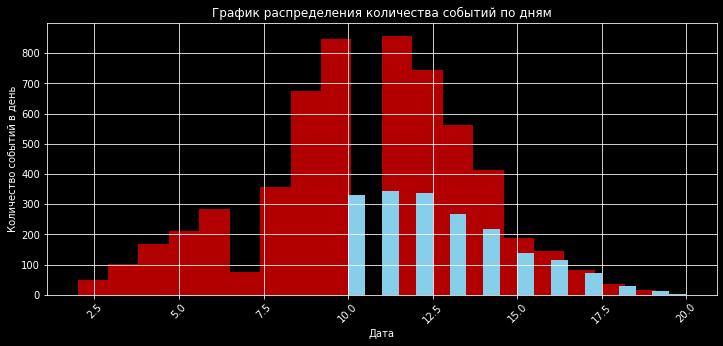

In [ ]:
plt.figure(figsize=(12,5))

plt.hist(buildings_events_final.query('last_event=="finished_stage_1"')['event'], color="red", bins = 20, alpha=0.7)
plt.hist(buildings_events_final.query('last_event=="project"')['event'], color="skyblue", bins = 20)

                                                                      
plt.title('График распределения количества событий по дням')
plt.ylabel("Количество событий в день")
plt.xlabel("Дата")
plt.xticks(rotation=45)
plt.grid()
plt.show()

Распределения выглядят сильно по-разному. Скорее всего будет значимое отличие.

In [ ]:
tariff_levene = st.levene(
    buildings_events_final.query('last_event == "project"')['event'],
    buildings_events_final.query('last_event == "finished_stage_1"')['event'])

print('p-значение:', tariff_levene.pvalue)

if (tariff_levene.pvalue < alpha):
    print("Отвергаем нулевую гипотезу о равенстве дисперсий: дисперсии не равны")
else:
    print("Не получилось отвергнуть нулевую гипотезу: дисперсии возможно равны")

p-значение: 6.451599275528656e-41
Отвергаем нулевую гипотезу о равенстве дисперсий: дисперсии не равны


**Гипотеза о равенстве средних двух генеральных совокупностей (для независимых выборок):**

H0 = среднее число построенных зданий одинаково для представителей разных стратегий равны (нет разница)
H0 = среднее число построенных зданий различно для представителей разных стратегий равны (есть разница)

Так как мы показали, что дисперсии неоднородны, установим параметр equal_var=False

In [ ]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    buildings_events_final.query('last_event == "project"')['event'],
    buildings_events_final.query('last_event == "finished_stage_1"')['event'],
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.624754689119661e-223
Отвергаем нулевую гипотезу


Имеются статистически значимые различия по среднему количеству построенных зданий между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком.

## Выводы и рекомендации

***Основные выводы исследования:***
1. Имеются статистически значимые различия по среднему количеству построенных зданий между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком:
    - Среднее число построенных зданий для прошедших уровень через проект составляет 12 штук, 
    - Для прошедших уровень через победу над врагом - 10 штук. 
    - То есть среди игроков, использовавших для прохождения уровня стратегию реализации проекта, среднее количество построенных зданий выше на 2, чем среди использующих стратегию победы над врагом. Поэтому **вторая стратегию потенциально менее прибыльная с точки зрения доходов с размещения рекламы**. Отсюда следует **рекомендация**:
    - Добавление дополнительного рекламного места, например, в окне принятия решения о нападении, чтобы сбалансировать рекламную нагрузку между игроками, придерживающимися разных стратегий (PVP и PVE).
    - Коррективровании баланса таким образом, чтобы мотивировать PVP-игроков строить больше зданий.
2. Наиболее эффективный рекламный источник с точки зрения кост-эффективности (CAC) это YouTube. Наименее эффективный - Facebook. Исходя из этого **рекомендуется**:
    - В последующих рекламных кампаниях перераспределить бюджет между истчниками, снизив долю Facebook.
    - В случае единства форматов рекламы (видеоролик) и, если в Facebook и YouTube были задействованы разные креативы, протестировать креатив из YouTube на Facebook.
3. Среди предствленных типов построек наиболее часто игроки строят spaceport, с небольшим отставанием идет assembly_shop. Значительно реже пользователи строят research_center. Что свидетельствует о **большей популярности среди игроков PVP-стратегии**. Отсюда **рекомендация**:
    - Повышать привлекательность PVE-стратегии в игре, например, за счет дополнительных очков за мирный/дипломатический стиль прохождения. 


***Другие выводы и наблюдения для справочного ознакомления:***
1. Среднее число пользователей в приложении в рассматриваемый период составлет 2884.879. Медианное значение существенно ниже - 1480.
2. Наибольшее число пользователей зафиксировано в период с 2020-05-06 по 2020-05-10.
3. Наименьшее число пользователей наблюдается с 2020-06-01 по 2020-06-05.
4. С начала рассматриваемого периода до 2020-05-10 наблюдался равномерный рост количества пользователей, после которого началось резкое снижение, которое с разной скоростью продолжалось вплоть до окончания периода: 2020-06-05 количество игроков достигло 4. Падение числа пользователей с 2020-05-10 связано с окончанием рекламной кампании.
5. Среднее число событий за день составляет 4110.273. Медианное - 1837.
6. Динамика распределения количества событий по дням в целом совпадает с распределением числа пользователей: с начала рассматриваемого периода до 2020-05-10 наблюдался равномерный рост количества пользователей, после которого началось резкое снижение, которое с разной скоростью продолжалось вплоть до окончания периода.
7. Среднее количество событий на пользователя составляет 10.
8. Наиболее популярный тип события - building. Что не удивительно, так как без постройки зданий невозможно пройти уровень.

10. Наибольший объем привлеченных пользователей приходится на инструмент контекстной рекламы - Яндекс.Директ. Наименьший у ОЛВ - YouTube.
11. Среднее число построенных зданий выше по источнику facebook_ads. Наименьший результат у YouTube. Однако различия составляют менее 1 здания.
12. Нельзя сказать, что в зависимости от источника сильно варьируется доля игроков, избравших разную стратегию: стратегию через победу над другим игроком избирают от 74.627 (facebook_ads) до 76.709 (yandex_direct) игроков.
13. В зависимости от источника доли типов построек также сильно не различаются.
13. Отсутствуют статистически значимые различия средних значений времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком.

[ПРЕЗЕНТАЦИЯ](https://disk.yandex.ru/i/X5OXDVh4lqcvXg)

[ДАШБОРД](https://public.tableau.com/app/profile/nikita3057/viz/_16466686572790/Dashboard1?publish=yes)